In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [5]:
matches=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\matches.csv',parse_dates=['date'])
deliveries=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\deliveries.csv')

deliveries.wide_runs.replace(0,np.nan,inplace=True)

488 ms ± 71.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
rcb_kixp=matches[((matches.team1=='Royal Challengers Bangalore') | (matches.team2=='Royal Challengers Bangalore')) & ((matches.team1=='Kings XI Punjab') | (matches.team2=='Kings XI Punjab'))]
rcb=matches[(matches.team1=='Royal Challengers Bangalore') | (matches.team2=='Royal Challengers Bangalore')]              
kixp=matches[(matches.team1=='Kings XI Punjab') | (matches.team2=='Kings XI Punjab')]

In [ ]:
def plot_helper(df,columns,size,plot_type,color):
    length=len(columns)
    fig,ax=plt.subplots(nrows=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],color=color)
        ax[i].set_title(columns[i])

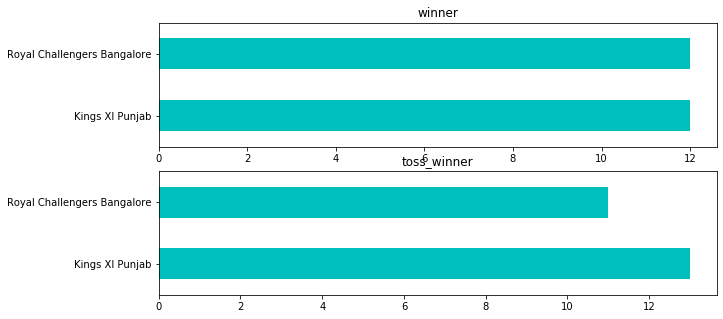

In [8]:
plot_helper(rcb_kixp,['winner','toss_winner',],(10,5),'barh','c')

In [9]:
rcb_kixp.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
41,42,2017,Bangalore,2017-05-05,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kings XI Punjab,19,0,Sandeep Sharma,M Chinnaswamy Stadium,CB Gaffaney,C Shamshuddin,NaN
83,84,2008,Bangalore,2008-05-05,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,S Sreesanth,M Chinnaswamy Stadium,SJ Davis,BR Doctrove,NaN
93,94,2008,Chandigarh,2008-05-12,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,9,SE Marsh,"Punjab Cricket Association Stadium, Mohali",BR Doctrove,I Shivram,NaN
126,127,2009,Durban,2009-04-24,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,7,RS Bopara,Kingsmead,BR Doctrove,TH Wijewardene,NaN


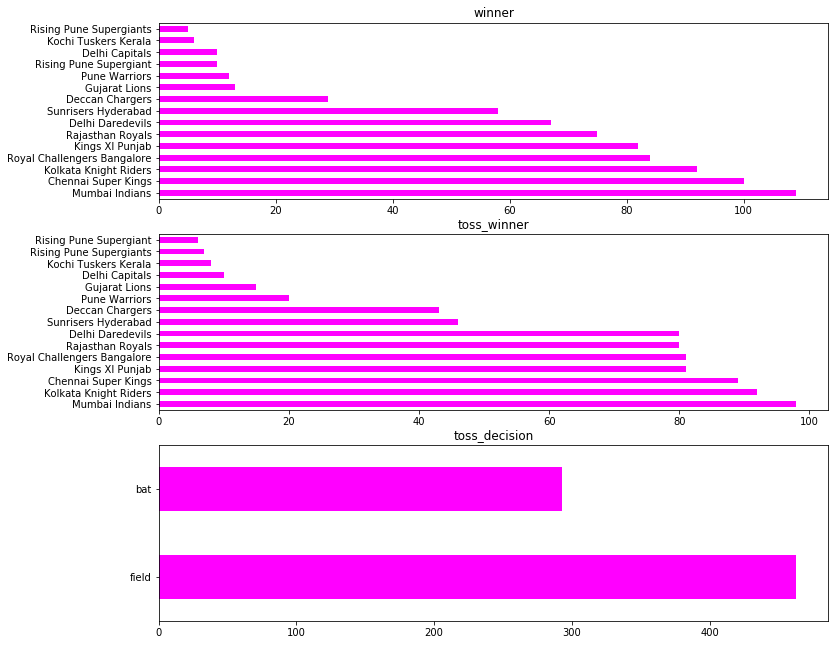

In [10]:
plot_helper(matches,['toss_decision','toss_winner','winner'][::-1],(12,11),'barh','magenta')


### It can be concluded that even though only by minute percentage , RCB is more likely to win the match

In [11]:
kixp.win_by_wickets.describe(),

(count    176.000000
 mean       3.375000
 std        3.420317
 min        0.000000
 25%        0.000000
 50%        4.000000
 75%        6.000000
 max       10.000000
 Name: win_by_wickets, dtype: float64,)

Text(0.5, 0, 'Frequency')

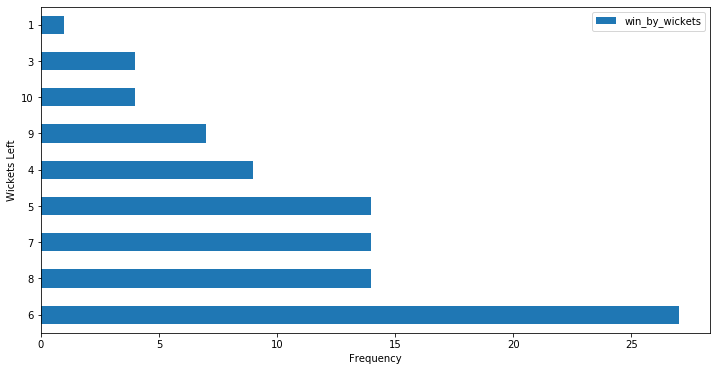

In [12]:
kixp.win_by_wickets.value_counts()[1:].plot.barh(figsize=(12,6),
                                                 legend=True,
                                                 ylabel='Wickets Left')
plt.xlabel('Frequency')



In [13]:
kixp.win_by_wickets.value_counts()

0     82
6     27
8     14
7     14
5     14
4      9
9      7
10     4
3      4
1      1
Name: win_by_wickets, dtype: int64

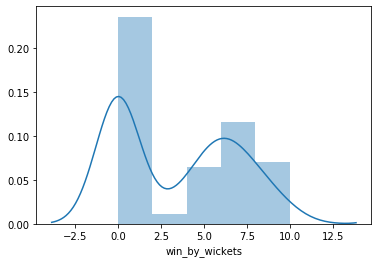

In [14]:
sns.distplot(kixp.win_by_wickets,bins=5)

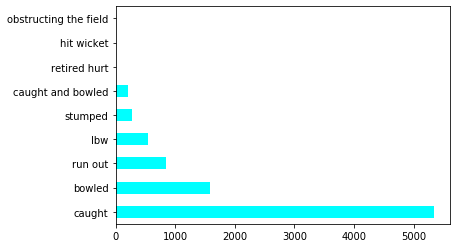

In [15]:
deliveries.dismissal_kind.value_counts().plot.barh(color='aqua')

### Now although in most of the matches kixp were left with around 6-7 wickets in the end the distribution alongwith the mean makes it clear for us that they are left with around 3 wickets which means in reality they will lose 6-7 wickets

In [16]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [17]:
deliveries[deliveries.batsman.str.contains('AB')].head(1).batsman

1688    AB de Villiers
Name: batsman, dtype: object

In [18]:
kohli_ab=deliveries[((deliveries.batsman=='V Kohli') | (deliveries.non_striker=='V Kohli')) & ((deliveries.batsman=='AB de Villiers') | (deliveries.non_striker=='AB de Villiers'))]
kohli_ab.head(3)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2647,12,1,Royal Challengers Bangalore,Mumbai Indians,10,3,AB de Villiers,V Kohli,HH Pandya,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2648,12,1,Royal Challengers Bangalore,Mumbai Indians,10,4,V Kohli,AB de Villiers,HH Pandya,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2649,12,1,Royal Challengers Bangalore,Mumbai Indians,10,5,V Kohli,AB de Villiers,HH Pandya,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [19]:
kohli_ab=kohli_ab.groupby('match_id').total_runs.sum()
kohli_ab.describe()

count     68.000000
mean      42.058824
std       49.900762
min        0.000000
25%        8.750000
50%       23.500000
75%       59.500000
max      229.000000
Name: total_runs, dtype: float64

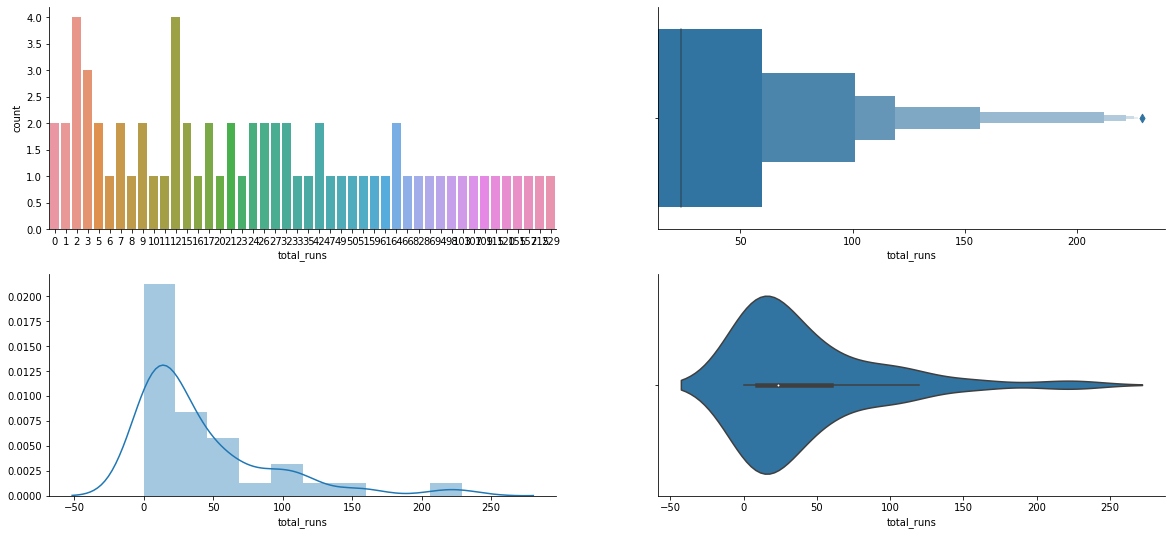

In [20]:
fig=plt.figure(figsize=(20,9))

fig.add_subplot(221)
sns.countplot(kohli_ab)

fig.add_subplot(222)
sns.boxenplot(kohli_ab)

fig.add_subplot(223)
sns.distplot(kohli_ab)

fig.add_subplot(224)
sns.violinplot(kohli_ab)

sns.despine()

### From the above analysis we can infer that their runs together including the extra runs will be within a range of 20-40

In [21]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [22]:
'''sixers_whole=deliveries.groupby(['match_id'],as_index=False).sum()

rcb_kixp_deli=deliveries[((deliveries.batting_team=='Royal Challengers Bangalore') | (deliveries.bowling_team=='Royal Challengers Bangalore')) & ((deliveries.batting_team=='Kings XI Punjab') | (deliveries.bowling_team=='Kings XI Punjab'))]
sixers_rcb_kixp=rcb_kixp_deli.groupby(['match_id'],as_index=False).sum()


#[sixers_whole.batsman_runs==6][sixers_rcb_kixp.batsman_runs==6]
fig=plt.figure(figsize=(16,9))
fig.add_subplot(221)
sns.countplot(sixers_whole.batsman_runs)
fig.add_subplot(222)
sns.countplot(sixers_rcb_kixp.batsman_runs)'''

"sixers_whole=deliveries.groupby(['match_id'],as_index=False).sum()\n\nrcb_kixp_deli=deliveries[((deliveries.batting_team=='Royal Challengers Bangalore') | (deliveries.bowling_team=='Royal Challengers Bangalore')) & ((deliveries.batting_team=='Kings XI Punjab') | (deliveries.bowling_team=='Kings XI Punjab'))]\nsixers_rcb_kixp=rcb_kixp_deli.groupby(['match_id'],as_index=False).sum()\n\n\n#[sixers_whole.batsman_runs==6][sixers_rcb_kixp.batsman_runs==6]\nfig=plt.figure(figsize=(16,9))\nfig.add_subplot(221)\nsns.countplot(sixers_whole.batsman_runs)\nfig.add_subplot(222)\nsns.countplot(sixers_rcb_kixp.batsman_runs)"

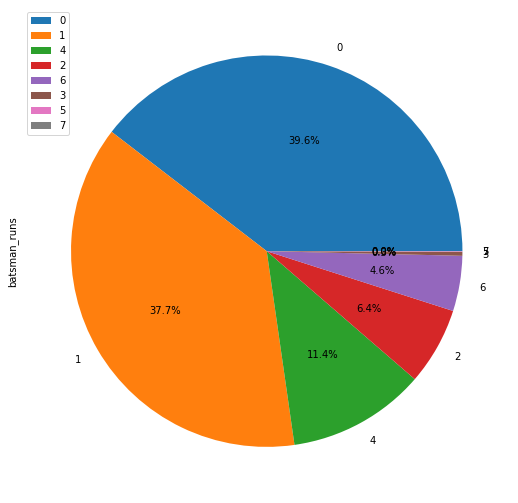

In [23]:
deliveries.batsman_runs.value_counts().plot.pie(figsize=(17,9),
                                                legend=True,
                                                autopct='%1.1f%%',
                                                )
plt.legend(loc='upper left')

In [24]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [25]:
sixers_whole=deliveries[deliveries.batsman_runs==6].groupby(['match_id'],as_index=False).count().batsman_runs

rcb_kixp_deli=deliveries[((deliveries.batting_team=='Royal Challengers Bangalore') | (deliveries.bowling_team=='Royal Challengers Bangalore')) & ((deliveries.batting_team=='Kings XI Punjab') | (deliveries.bowling_team=='Kings XI Punjab'))]
sixersrcb_kixp=rcb_kixp_deli[rcb_kixp_deli.batsman_runs==6].groupby(['match_id'],as_index=False).count().batsman_runs


In [26]:
sixers_whole.head(3)

0    17
1    17
2    14
Name: batsman_runs, dtype: int64

In [27]:
sixersrcb_kixp.head(3)

0    20
1     6
2     4
Name: batsman_runs, dtype: int64

In [28]:
sixers_whole.describe()

count    756.000000
mean      10.806878
std        5.439834
min        1.000000
25%        7.000000
50%       10.000000
75%       14.000000
max       33.000000
Name: batsman_runs, dtype: float64

In [29]:
sixersrcb_kixp.describe()

count    24.000000
mean     12.041667
std       5.774601
min       4.000000
25%       7.000000
50%      11.500000
75%      16.750000
max      21.000000
Name: batsman_runs, dtype: float64

### From the above analysis it is pretty evident that there will be around 10 sixes atleast

In [30]:
noball_df=deliveries.pivot_table(index='match_id',aggfunc='sum').noball_runs
noball_df.describe()

count    756.000000
mean       0.990741
std        1.190990
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: noball_runs, dtype: float64

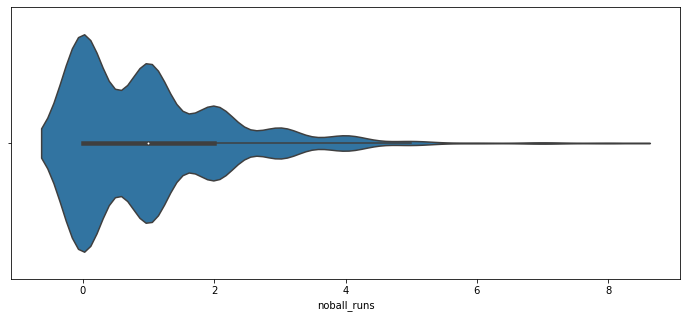

In [31]:
plt.figure(figsize=(12,5))
sns.violinplot(noball_df)

In [32]:
#Just to confirm
deliveries[deliveries.match_id==1].noball_runs.sum()

2

In [33]:
noballteams_df=rcb_kixp_deli.pivot_table(index='match_id',aggfunc='sum').noball_runs
noballteams_df.describe()

count    24.000000
mean      1.208333
std       1.444003
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       6.000000
Name: noball_runs, dtype: float64

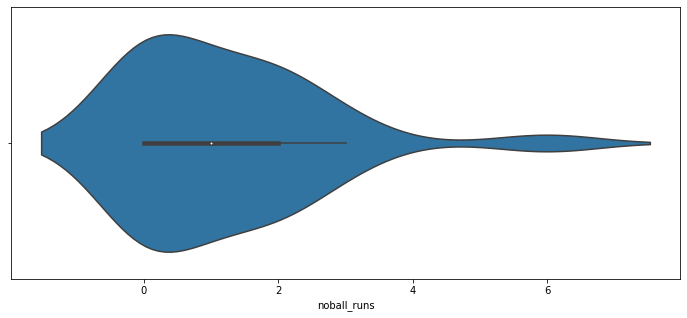

In [34]:
plt.figure(figsize=(12,5))
sns.violinplot(noballteams_df)

### As there are very low number of no balls which give more than 1 run we can simply sum them without worrying much about their weightage and through our findings we can pretty confidently say that there will be around 0-2 no balls in the match